# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

655

In [3]:
#Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set counters for records and sets 
record_counter =0
set_counter =1

# Set lists for
longitude=[]
latitude =[]
temperature=[]
humidity=[]
wind=[]
clouds=[]
city_name =[]
country=[]

print("Beginning Data Retrieval")
print("-------------------------------")

#Loop trhough the cities and store for each the targeted information and print results
for city in cities:
    
    try:
        response= requests.get(query_url + city).json()
        longitude.append(response["coord"]["lon"])
        latitude.append(response["coord"]["lat"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])

#Count cities in sets of 50 records each seat        
        if record_counter==50:
            record_counter=1
            set_counter+=1
        else:
            record_counter+=1
        
        print("Processing Record " + str(record_counter)+ " of Set "+ str(set_counter)+ "|"+ (city))


    except KeyError:
        print("City not found. Skipping....")

        
# Add a one second interval between queries to stay within API query limits
time.sleep(1) 

print("---------------------------------------")
print("Data Retrieval Completed")
print("---------------------------------------")
       

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1|chambas
Processing Record 2 of Set 1|hithadhoo
Processing Record 3 of Set 1|lata
Processing Record 4 of Set 1|naryan-mar
Processing Record 5 of Set 1|san javier
Processing Record 6 of Set 1|port alfred
Processing Record 7 of Set 1|punta arenas
Processing Record 8 of Set 1|busselton
Processing Record 9 of Set 1|beloha
Processing Record 10 of Set 1|puerto ayora
Processing Record 11 of Set 1|muncar
Processing Record 12 of Set 1|terracina
Processing Record 13 of Set 1|cienfuegos
Processing Record 14 of Set 1|tual
Processing Record 15 of Set 1|deputatskiy
Processing Record 16 of Set 1|cape town
Processing Record 17 of Set 1|tomatlan
Processing Record 18 of Set 1|siwana
Processing Record 19 of Set 1|barrow
Processing Record 20 of Set 1|puerto suarez
City not found. Skipping....
Processing Record 21 of Set 1|hokitika
Processing Record 22 of Set 1|royan
Processing Record 23 of Set 1|jamestown
Processing Recor

Processing Record 45 of Set 4|fortuna
City not found. Skipping....
Processing Record 46 of Set 4|codajas
Processing Record 47 of Set 4|blatnica
Processing Record 48 of Set 4|kruisfontein
City not found. Skipping....
Processing Record 49 of Set 4|bredasdorp
Processing Record 50 of Set 4|gold coast
Processing Record 1 of Set 5|pierre
Processing Record 2 of Set 5|nanortalik
Processing Record 3 of Set 5|castro
Processing Record 4 of Set 5|avera
Processing Record 5 of Set 5|gaur
Processing Record 6 of Set 5|grand-lahou
Processing Record 7 of Set 5|poronaysk
Processing Record 8 of Set 5|toora-khem
Processing Record 9 of Set 5|ribas do rio pardo
Processing Record 10 of Set 5|boo
Processing Record 11 of Set 5|truro
Processing Record 12 of Set 5|muravlenko
Processing Record 13 of Set 5|abeche
Processing Record 14 of Set 5|samarai
City not found. Skipping....
Processing Record 15 of Set 5|idil
City not found. Skipping....
Processing Record 16 of Set 5|ordzhonikidze
Processing Record 17 of Set 5|

Processing Record 27 of Set 8|guerrero negro
Processing Record 28 of Set 8|aksu
Processing Record 29 of Set 8|jakar
Processing Record 30 of Set 8|adrar
Processing Record 31 of Set 8|alofi
City not found. Skipping....
City not found. Skipping....
Processing Record 32 of Set 8|katherine
Processing Record 33 of Set 8|kakonko
Processing Record 34 of Set 8|opuwo
Processing Record 35 of Set 8|hobyo
Processing Record 36 of Set 8|zlitan
Processing Record 37 of Set 8|valkla
Processing Record 38 of Set 8|taoudenni
Processing Record 39 of Set 8|miles city
Processing Record 40 of Set 8|marawi
Processing Record 41 of Set 8|isangel
Processing Record 42 of Set 8|pyinmana
Processing Record 43 of Set 8|nemuro
Processing Record 44 of Set 8|simao
Processing Record 45 of Set 8|abu dhabi
Processing Record 46 of Set 8|college
Processing Record 47 of Set 8|alekseyevsk
Processing Record 48 of Set 8|upington
Processing Record 49 of Set 8|ladario
Processing Record 50 of Set 8|boyolangu
Processing Record 1 of Se

City not found. Skipping....
City not found. Skipping....
Processing Record 23 of Set 12|shakawe
Processing Record 24 of Set 12|kamina
Processing Record 25 of Set 12|kloulklubed
Processing Record 26 of Set 12|chapais
Processing Record 27 of Set 12|waipawa
Processing Record 28 of Set 12|mehamn
Processing Record 29 of Set 12|sao jose da coroa grande
---------------------------------------
Data Retrieval Completed
---------------------------------------


### Convert Raw Data to DataFrame
#### Export the city data into a .csv.
#### Display the DataFrame



In [5]:
# Create a Dataframe

city_data_df= pd.DataFrame({
                         "City": city_name,
                         "Country": country,
                         "Longitude": longitude,
                         "Latitude": latitude,
                         "Max. Temperature (C)": temperature,
                         "Humidity (%)": humidity,
                         "Wind Speed (m/s)": wind,
                         "Cloudiness (%)": clouds
                        }) 
     
                        
                        
#Save DataFrame as csv file
pd.DataFrame.to_csv(city_data_df, "city_data.csv")


In [6]:
#Display DataFrame
city_data_df.head()

,City,Country,Longitude,Latitude,Max. Temperature (C),Humidity (%),Wind Speed (m/s),Cloudiness (%)
0,Chambas,CU,-78.91,22.19,27.00,78,7.20,40
1,Hithadhoo,MV,73.08,-0.60,27.91,74,4.92,10
2,Lata,IN,78.62,30.78,2.93,20,3.74,0
3,Naryan-Mar,RU,53.09,67.67,-14.45,92,3.91,50
4,San Javier,BR,-55.13,-27.87,19.44,97,1.74,100


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

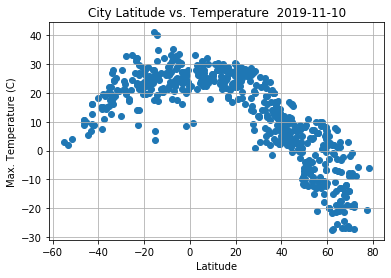

In [12]:
#Plot save as "Temperature".png
plt.scatter(city_data_df["Latitude"], city_data_df[ "Max. Temperature (C)"])
plt.title("City Latitude vs. Temperature  " + str(date.today()))
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (C)")
plt.grid(True)
plt.savefig("Temperature.png", bbox_inches='tight')


#### Latitude vs. Humidity Plot

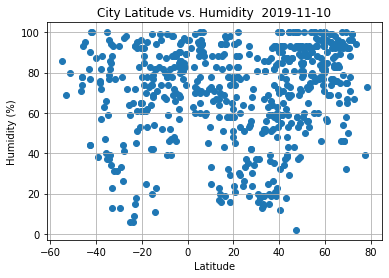

In [8]:
#Plot save as "Humidity".png
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity (%)"])
plt.title("City Latitude vs. Humidity  " + str(date.today()))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Humidity.png", bbox_inches='tight')


#### Latitude vs. Cloudiness Plot

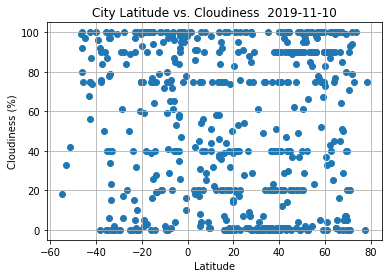

In [14]:
#Plot save as "Cloudiness".png
plt.scatter(city_data_df["Latitude"], city_data_df[ "Cloudiness (%)"])
plt.title("City Latitude vs. Cloudiness  " + str(date.today()))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Cloudiness.png", bbox_inches='tight')


#### Latitude vs. Wind Speed Plot

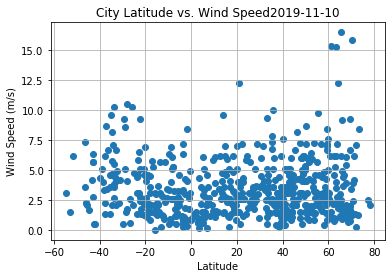

In [10]:
#Plot save as "WindSpeed".png
plt.scatter(city_data_df["Latitude"], city_data_df[ "Wind Speed (m/s)"])
plt.title("City Latitude vs. Wind Speed" + str(date.today()))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.savefig("WindSpeed.png", bbox_inches='tight')


In [11]:
# OBSERVATION 1: Plot "Temperature".png confirms as expected that when approaching to the Equator the maximum temperature increases.
# OBSERVATION 2: Plot "Humidity".png shows there is no correlation between Latitude and Humidity. It is curious that most of the cities from the sample have a percentage of humidity over 60%
# OBSERVATION 3: Plot "Cloudiness".png shows there is no correlation between latitude and cloudiness and the sample is very spread throughout the values. Mean while plot "WindSpeed" also shows that there is no correlation between Latitude and Wind Speed, however, the sample of cities is more concentrate where Wind Speed values are bellow 5 m/s.